In [11]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from utils import models
from torchvision.transforms import Normalize
from captum.attr import Saliency

In [12]:
device = torch.device('mps')

# Create models
generator = models.GeneratorMNIST().to(device)
discriminator = models.DiscriminatorMNIST().to(device)

# Load weights (model.load_state_dict(torch.load(PATH)))
generator.load_state_dict(torch.load('results/weights/gen_epoch_4.pth', map_location=torch.device(device)))
discriminator.load_state_dict(torch.load('results/weights/disc_epoch_4.pth', map_location=torch.device(device)))

<All keys matched successfully>

In [13]:
norm = Normalize((0.5,), (0.5,))

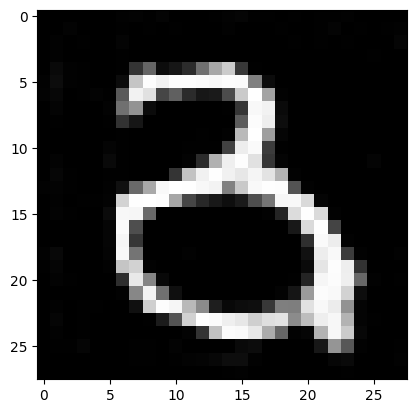

In [14]:
# Generate a fake sample
noise = torch.randn(1, 100, 1, 1, device=device)

fake = generator(noise)

img = fake.cpu().detach().numpy()
img = np.squeeze(img)

plt.imshow(img, cmap='gray')

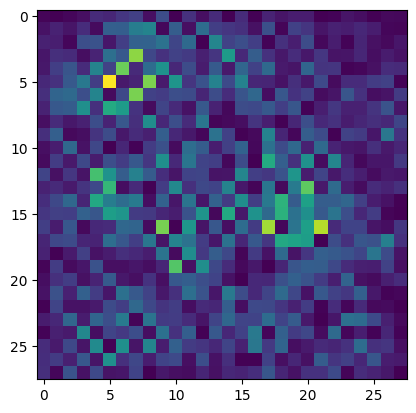

In [15]:
# Saliency
saliency = Saliency(discriminator)
explanation = saliency.attribute(fake)
explanation = norm(explanation)

grads_img = explanation.squeeze().cpu().detach().numpy()
plt.imshow(grads_img)

In [16]:
print(torch.max(fake))
print(torch.max(explanation))

tensor(0.9922, device='mps:0', grad_fn=<MaxBackward1>)
tensor(-0.7191, device='mps:0')


In [17]:
mse = torch.nn.MSELoss(reduction='none')

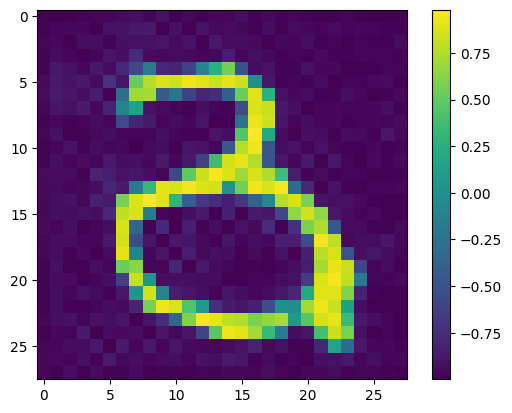

In [18]:
mul = fake * -explanation
# mse(fake, explanation)

mul_img = mul.squeeze().cpu().detach().numpy()
im = plt.imshow(mul_img)
plt.colorbar(im)